## Setup

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.5MB/s 
     |████████████████████████████████| 1.2MB 39.2MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 204kB 51.2MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [16]:
from fastai.vision.widgets import *

## Importing Data

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
!unzip DevanagariHandwrittenCharacterDataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104096.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104099.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104101.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12716.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12723.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12724.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12725.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12726.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12727.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12731.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12732.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12735.png  
 extracting: Devanagar

In [10]:
path=Path('DevanagariHandwrittenCharacterDataset')
path.ls()

(#2) [Path('DevanagariHandwrittenCharacterDataset/Test'),Path('DevanagariHandwrittenCharacterDataset/Train')]

In [11]:
(path/'Train').ls()

(#46) [Path('DevanagariHandwrittenCharacterDataset/Train/character_6_cha'),Path('DevanagariHandwrittenCharacterDataset/Train/character_14_dhaa'),Path('DevanagariHandwrittenCharacterDataset/Train/digit_3'),Path('DevanagariHandwrittenCharacterDataset/Train/character_18_da'),Path('DevanagariHandwrittenCharacterDataset/Train/character_15_adna'),Path('DevanagariHandwrittenCharacterDataset/Train/character_10_yna'),Path('DevanagariHandwrittenCharacterDataset/Train/character_35_tra'),Path('DevanagariHandwrittenCharacterDataset/Train/digit_2'),Path('DevanagariHandwrittenCharacterDataset/Train/character_33_ha'),Path('DevanagariHandwrittenCharacterDataset/Train/character_34_chhya')...]

## Creating DataBlock and DataLoaders

In [14]:
images = DataBlock(
    blocks = (ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items = get_image_files,
    splitter = GrandparentSplitter(train_name='Train', valid_name='Test'),
    get_y = parent_label
)

In [15]:
dls = images.dataloaders(path)

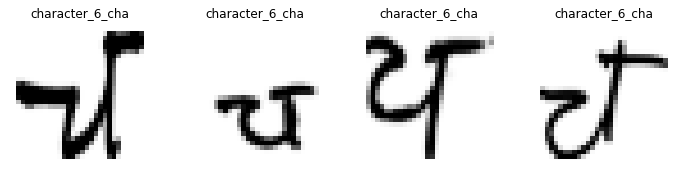

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

## Creating a CNN Learner with Resnet18

In [21]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.019054606556892395)

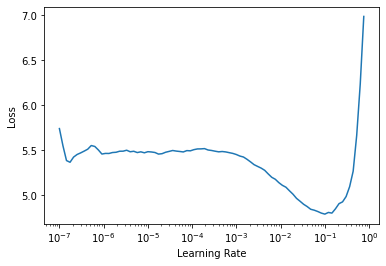

In [19]:
learn.lr_find()

In [22]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.731336,1.319192,0.369710,01:31


epoch,train_loss,valid_loss,error_rate,time
0,0.339880,0.189784,0.056884,01:35
1,0.156265,0.091982,0.027101,01:35
2,0.072258,0.059955,0.016594,01:36
3,0.038832,0.055087,0.015797,01:36


## Interpretation

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

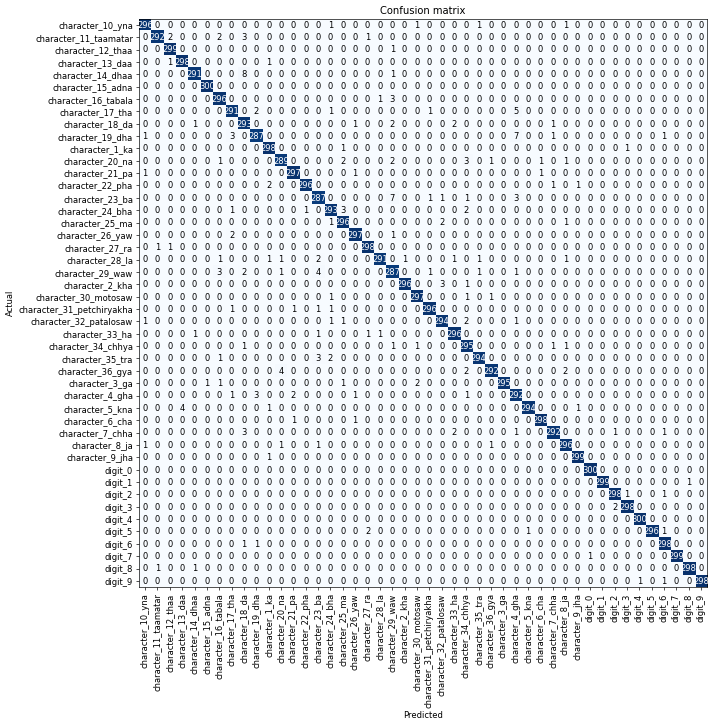

In [36]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

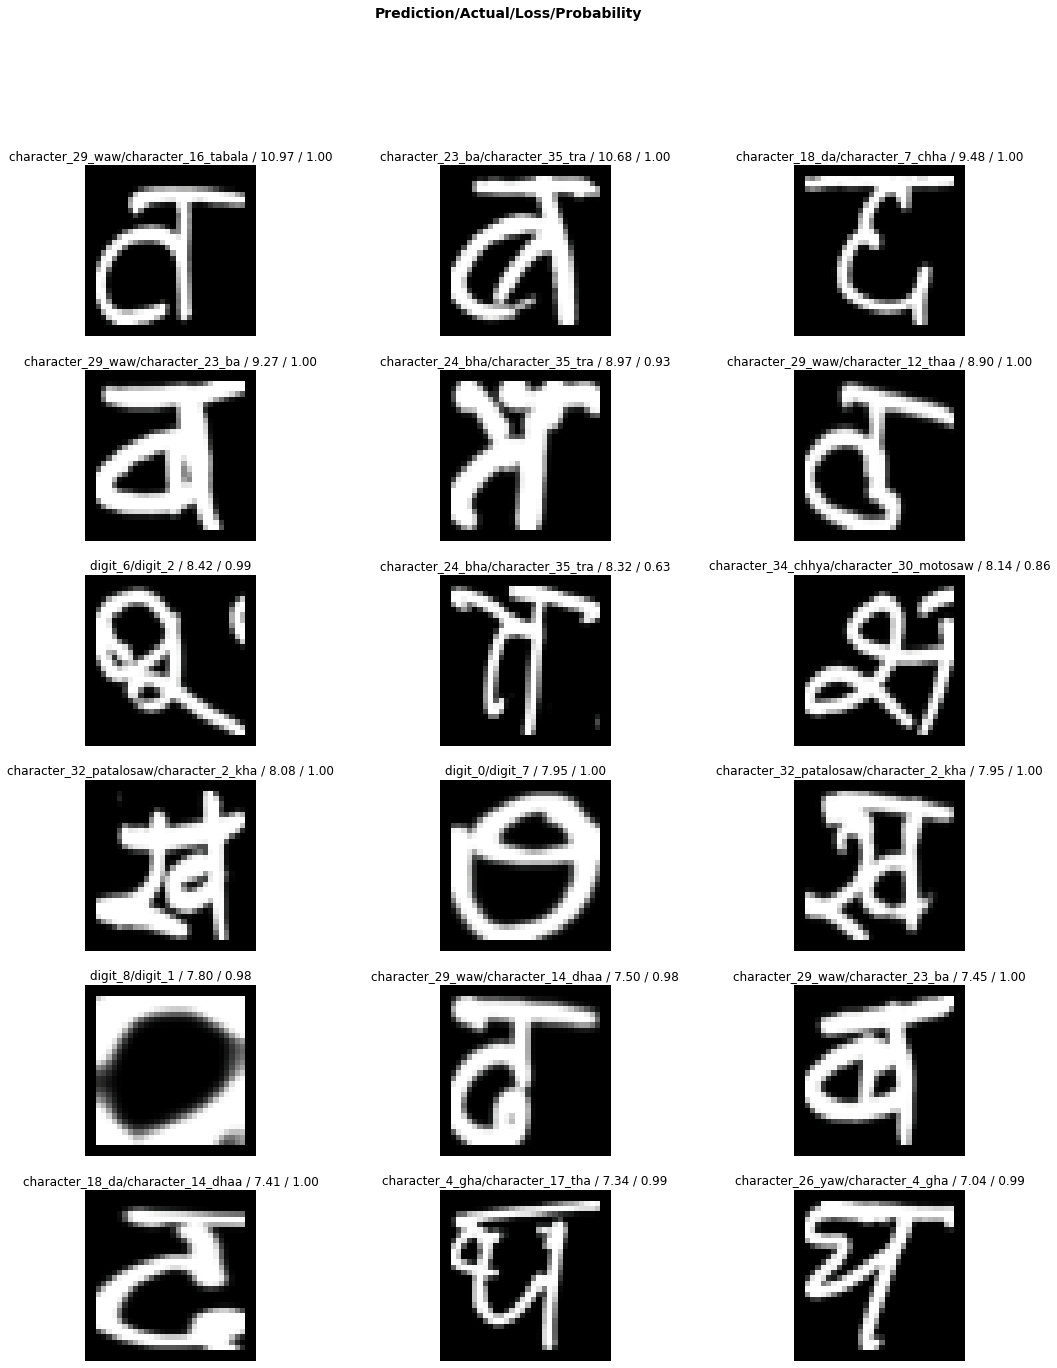

In [41]:
interp.plot_top_losses(18, figsize=(18,22), nrows=6)

In [29]:
learn.export('model.pkl')

In [33]:
path = Path()

In [34]:
path.ls()

(#8) [Path('.config'),Path('export.pkl'),Path('model.pkl'),Path('gdrive'),Path('DevanagariHandwrittenCharacterDataset'),Path('DevanagariHandwrittenCharacterDataset.zip'),Path('models'),Path('sample_data')]